In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [23]:
data = pd.read_csv("Downloads/diabetes.csv")



In [31]:


y = data.Outcome.values
x = data.drop(["Outcome"], axis = 1)

x = (x - np.min(x))/(np.max(x)-np.min(x)).values

In [49]:


n =len(x)

x_train, x_test, y_train, y_test = x[(8000//n):],x[:int((8000/n))],y[(8000//n):],y[:(8000//n)]


features = x_train.T
labels = y_train.T
test_features = x_test.T
test_labels = y_test.T

# print("features: ", features.shape)
# print("labels: ", labels.shape)
# print("test_features: ", test_features.shape)
# print("test_labels: ", test_labels.shape)

features:  (8, 758)
labels:  (758,)
test_features:  (8, 10)
test_labels:  (10,)


In [50]:
 
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1),0.01)
    b= 0.0
    return w,b

In [51]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [52]:


def foward_and_backward_propagation(w, b, x_train, y_train):
    #Forward Propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]          #x_train.shape[1] is for scaling
    
    # Backward Propagation
    derivative_weight = (np.dot(x_train, ((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost, gradients

In [53]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterations):
    cost_list = []
    cost_list2 = []
    index = []
    
    # Updating (learning) parameters is number_of_iterations times
    for i in range(number_of_iterations):
        
        cost, gradients = foward_and_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        #Let's update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iterations %i: %f" %(i, cost))
            
    # We update (learn) parameters weights and bias
    parameters = {"weight": w, "bias": b}
    plt.plot(index, cost_list2)
    plt.title("Cost-Iteration Relation")
    plt.xticks(index, rotation = "vertical")
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [54]:
def predict(w, b, x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T, x_test)+b)
    y_prediction = np.zeros((1, x_test.shape[1]))
    #
    #
    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1
            
    return y_prediction

Cost after iterations 0: 0.695924
Cost after iterations 10: 0.632291
Cost after iterations 20: 0.612366
Cost after iterations 30: 0.596234
Cost after iterations 40: 0.582958
Cost after iterations 50: 0.571860
Cost after iterations 60: 0.562450
Cost after iterations 70: 0.554371
Cost after iterations 80: 0.547357
Cost after iterations 90: 0.541210
Cost after iterations 100: 0.535778
Cost after iterations 110: 0.530942
Cost after iterations 120: 0.526611
Cost after iterations 130: 0.522708
Cost after iterations 140: 0.519175
Cost after iterations 150: 0.515962
Cost after iterations 160: 0.513028
Cost after iterations 170: 0.510339
Cost after iterations 180: 0.507866
Cost after iterations 190: 0.505585
Cost after iterations 200: 0.503476
Cost after iterations 210: 0.501521
Cost after iterations 220: 0.499703
Cost after iterations 230: 0.498010
Cost after iterations 240: 0.496430
Cost after iterations 250: 0.494953
Cost after iterations 260: 0.493569
Cost after iterations 270: 0.492271
Cos

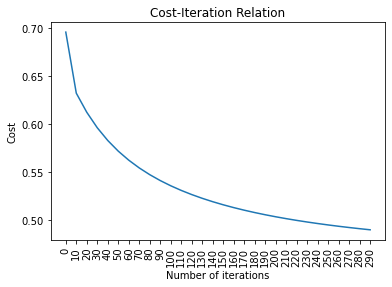

In [67]:
def train_logistic_regression(features, labels, learning_rate ,  num_iterations):
    # Initialize
    dimension =  features.shape[0]  # It is 8
    w,b = initialize_weights_and_bias(dimension)
    parameters, gradients, cost_list = update(w, b, features, labels, learning_rate,num_iterations)

    return parameters

    
params = train_logistic_regression(features, labels,learning_rate = 1.5, num_iterations = 300)


In [68]:
def test_logistic_regression(params, test_features, test_labels, learning_rate ,  num_iterations):
 
    y_prediction_test = predict(params["weight"],params["bias"],test_features)
    # Print test errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - test_labels)) * 100))
test_logistic_regression(params, test_features,test_labels,learning_rate = 1.5, num_iterations = 300)

test accuracy: 70.0 %
